## Panda Data Testing Using MiniBooNE Dataset
<a href="https://pbs.twimg.com/media/C4f3GF6WAAAY1Ok.jpg:large">Pandas cheat sheet for reference</a>
<img src="https://pbs.twimg.com/media/C4f3GF6WAAAY1Ok.jpg:large" >

<br>
<br>
What follows is an example of pandas usage using the MiniBooNE PID dataset from: https://archive.ics.uci.edu/ml/datasets/MiniBooNE+particle+identification


In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab
import seaborn as sns

#Plot formatting for presentation
plt.style.use(['bmh'])

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

#Load the header information from the text file
#The header contains the number of signal and background events
mbsigback=pd.read_table("data/MiniBooNE_PID.txt", delimiter=r"\s+", nrows=1, header=None)
nsig=mbsigback[0][0]
nback=mbsigback[1][0]

#Load the signal and background into separate dataframes
mbsig=pd.read_table("data/MiniBooNE_PID.txt", delimiter=r"\s+", nrows=1000, skiprows=1, header=None)
mbback=pd.read_table("data/MiniBooNE_PID.txt", delimiter=r"\s+", nrows=1000, skiprows=1+nsig, header=None)

#Add labels column to mbsig and mbback (0 = signal, 1 = background)
mbsig['sigback'] = pd.Series([0 for x in range(len(mbsig.index))], index=mbsig.index)
mbback['sigback'] = pd.Series([1 for x in range(len(mbback.index))], index=mbback.index)

#Merge the dataframes into one
mball=pd.concat([mbsig,mbback]) 

#Clean default values from the dataset (remove entries with -999.00 in any field)
for col in mball:
    mball=mball[mball[col]!=-999.00]
    
#Rescale data to be from 0 to 1
norm_cols = [i for i in range(50)]
mball[norm_cols] = mball[norm_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print ("done loading data")

done loading data


In [20]:
print("Total signal entries:", nsig)
print("Total background entries:", nback)
mball


Total signal entries: 36499
Total background entries: 93565


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,sigback
0,0.028123,0.059046,0.004454,0.422979,0.406012,0.615890,0.213681,0.864443,0.373392,0.540899,...,0.597634,0.165953,0.077805,0.000000,0.181190,0.913965,0.028048,0.379649,0.469116,0
1,0.211653,0.086877,0.003902,0.231337,0.538792,0.594252,0.300111,0.834426,0.372038,0.404497,...,0.815375,0.068753,0.081576,0.003711,0.183756,0.865763,0.062589,0.389210,0.432584,0
2,0.142557,0.173582,0.007783,0.161098,0.454322,0.429093,0.312839,0.843981,0.320409,0.338035,...,0.653418,0.087913,0.114605,0.012099,0.283681,0.884896,0.068221,0.386358,0.314447,0
3,0.272557,0.065549,0.145824,0.335403,0.402811,0.000000,0.277090,0.741537,0.234457,0.322595,...,0.633996,0.167181,0.026087,0.000000,0.362181,0.931301,0.308726,0.394302,0.499990,0
4,0.511248,0.116317,0.012931,0.229883,0.503048,0.384208,0.397590,0.681150,0.395480,0.331551,...,0.806929,0.016262,0.028838,0.000000,0.341960,0.839592,0.333169,0.447314,0.487879,0
5,0.290953,0.324559,0.014425,0.450377,0.371899,0.219925,0.179074,0.624000,0.328164,0.264168,...,0.633747,0.186649,0.079463,0.000000,0.312389,0.935090,0.247947,0.509067,0.335727,0
6,0.146471,0.116609,0.009842,0.275233,0.404730,0.478197,0.366373,0.855428,0.319427,0.479796,...,0.653968,0.125605,0.062357,0.000000,0.205435,0.897921,0.057314,0.401543,0.488359,0
7,0.077169,0.023570,0.002084,0.252374,0.461858,0.849887,0.338690,0.876926,0.306529,0.516164,...,0.615518,0.120893,0.059515,0.005820,0.216326,0.889482,0.027591,0.370357,0.430032,0
8,0.246876,0.092667,0.018083,0.296670,0.377625,0.277916,0.408338,0.852711,0.265433,0.367519,...,0.654963,0.179047,0.050353,0.000000,0.363202,0.920623,0.103402,0.393750,0.376859,0
9,0.206697,0.065074,0.006346,0.246093,0.410952,0.468791,0.376500,0.867317,0.199838,0.395756,...,0.732822,0.179125,0.014542,0.000000,0.390971,0.908708,0.141705,0.383905,0.588514,0


In [15]:
mbsig.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,sigback
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,3.807219,0.956074,166.617282,0.249521,0.014076,0.243163,1.181958,0.867801,3.320448,0.197526,...,-7.415499,0.606718,4.572601,0.002644,0.153596,0.000251,1.770367,0.706749,0.237258,0.0
std,0.716938,0.746325,391.517913,0.031336,0.013388,0.158932,0.290658,0.050221,0.215354,0.040441,...,25.949539,0.978780,2.390973,0.010699,0.054820,0.457269,1.241574,0.945119,0.047473,0.0
min,2.399560,0.093330,0.101678,0.164130,-0.001866,0.000000,0.415171,0.539654,2.433410,0.095538,...,-152.735000,-1.092480,0.774474,0.000000,0.044514,-5.447920,0.069486,-0.631213,0.064666,0.0
25%,3.235918,0.437744,16.040200,0.230816,0.004425,0.129263,0.970227,0.843008,3.192258,0.170952,...,-21.388675,-0.044486,2.914310,0.000000,0.113582,-0.162898,0.909779,0.045486,0.208531,0.0
50%,3.784545,0.726002,40.166700,0.247299,0.010480,0.256252,1.173295,0.877639,3.313545,0.195386,...,-9.255075,0.385418,4.146865,0.000000,0.144804,0.084841,1.383940,0.341204,0.238747,0.0
75%,4.290980,1.285023,125.163000,0.264105,0.020253,0.375497,1.369832,0.902039,3.445873,0.222191,...,5.497397,1.016220,5.815148,0.001313,0.183172,0.274552,2.311602,1.090853,0.266231,0.0
max,7.355150,5.555810,4622.800000,0.453926,0.096603,0.590068,2.196180,0.977329,3.992330,0.405914,...,111.531000,8.343110,18.444600,0.139651,0.435779,1.012760,8.429430,5.893840,0.432352,0.0


In [16]:
mbback.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,sigback
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,1.226766,-2.290173,108.718552,-3.701956,-3.988809,-3.865279,-3.100932,-3.191325,-0.502434,-3.831725,...,-31.577648,-3.279989,2.623599,-3.985017,-3.809731,-4.209465,-0.808515,-2.043891,-3.767176,1.0
std,63.426193,63.200396,96.507816,63.106040,63.087825,63.095719,63.144961,63.138422,63.309353,63.097797,...,69.819732,63.142633,63.701700,63.088072,63.099238,63.082649,63.317937,63.245553,63.101900,0.0
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,1.0
25%,4.595740,1.205432,79.762825,0.253942,0.000000,0.082392,0.673353,0.770315,3.354800,0.136069,...,-43.424300,-0.036714,3.824010,0.000000,0.125475,-0.455118,1.776887,0.541186,0.197118,1.0
50%,5.205390,1.598375,114.631500,0.290275,0.003697,0.131984,0.838151,0.818736,3.475430,0.162424,...,-27.461850,0.434883,5.224830,0.000000,0.180750,0.010206,2.809260,1.483920,0.228355,1.0
75%,5.859505,2.071192,137.348000,0.329397,0.009124,0.169243,1.053480,0.854253,3.618730,0.187434,...,-9.713248,1.186550,7.715953,0.002488,0.238759,0.298777,4.086067,2.771030,0.263090,1.0
max,9.318040,6.452360,1137.960000,0.590979,0.103853,0.607889,3.225860,0.928466,5.548740,0.412486,...,92.452300,8.102330,66.195400,0.318501,0.499579,1.323650,13.906300,17.062000,0.469428,1.0


In [17]:
mball.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,sigback
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,...,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000
mean,0.307073,0.195044,0.030252,0.314769,0.412148,0.308143,0.290650,0.765922,0.314710,0.349559,...,0.636600,0.189223,0.073873,0.021435,0.340833,0.892679,0.174492,0.425666,0.439443,0.498998
std,0.162332,0.134398,0.061058,0.114313,0.079960,0.231257,0.110382,0.110791,0.080119,0.122706,...,0.088907,0.111058,0.061780,0.075400,0.148862,0.061553,0.127005,0.063444,0.121271,0.500124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185105,0.092328,0.006577,0.239733,0.358318,0.155196,0.208414,0.702559,0.265445,0.262426,...,0.590408,0.114937,0.039207,0.000000,0.235520,0.879999,0.078987,0.382670,0.366198,0.000000
50%,0.291009,0.179384,0.019867,0.289223,0.385076,0.260131,0.281973,0.786209,0.308999,0.342387,...,0.639305,0.162496,0.058867,0.000000,0.319359,0.904724,0.143109,0.407990,0.440324,0.000000
75%,0.413410,0.265993,0.029540,0.374386,0.440185,0.466618,0.364565,0.847641,0.358315,0.422414,...,0.682342,0.236213,0.088197,0.005356,0.423378,0.922190,0.229410,0.448406,0.514456,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


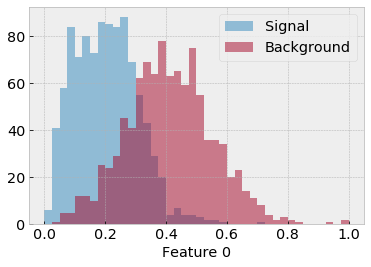

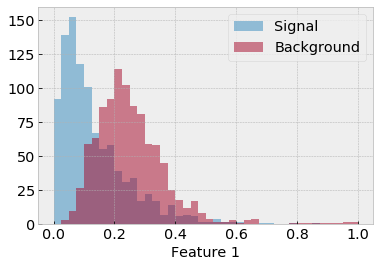

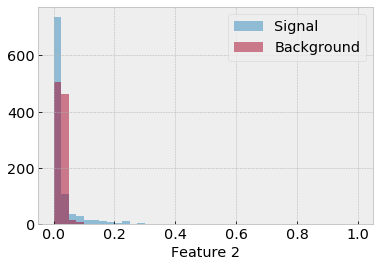

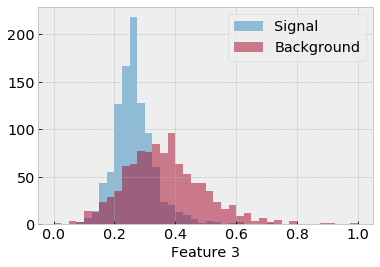

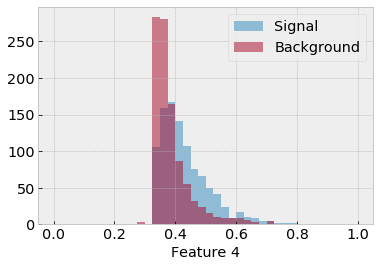

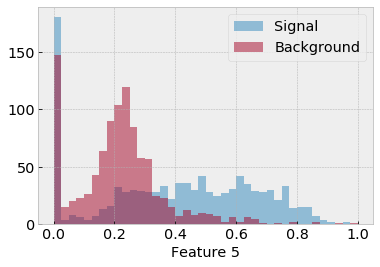

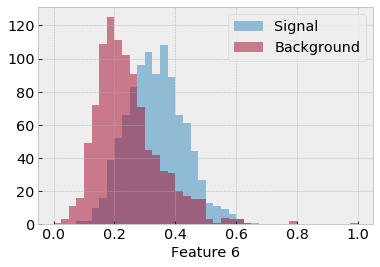

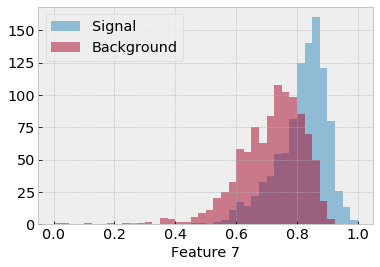

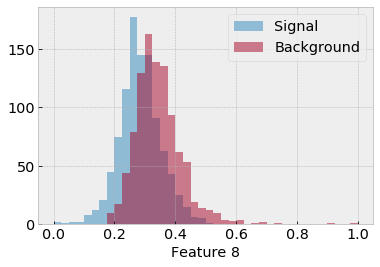

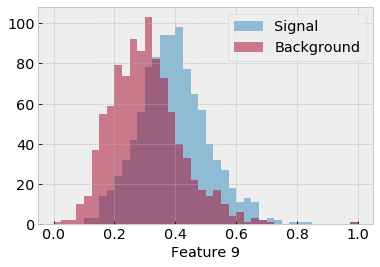

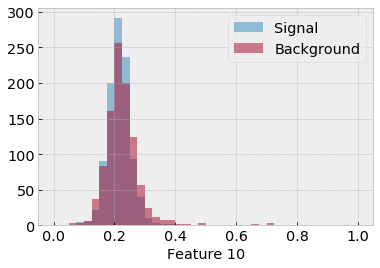

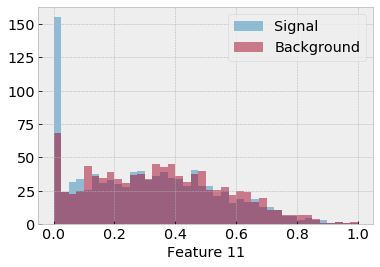

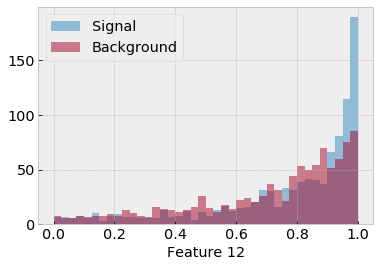

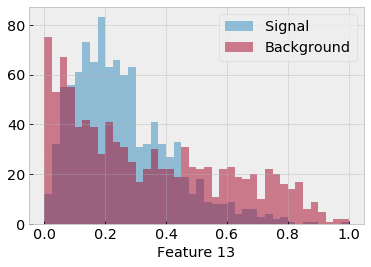

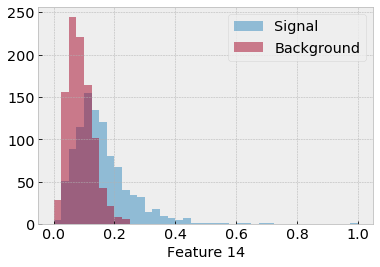

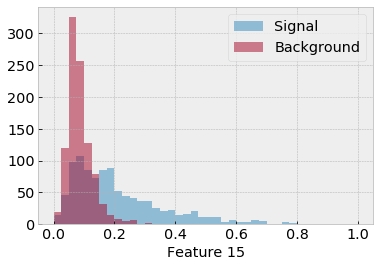

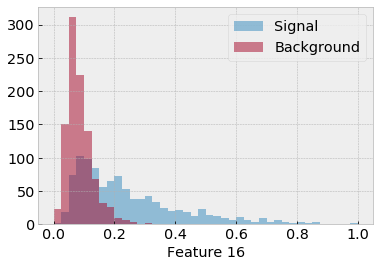

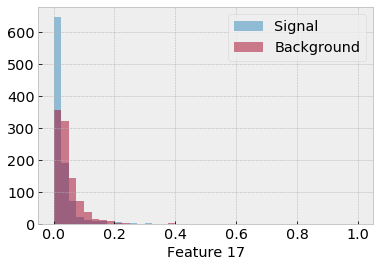

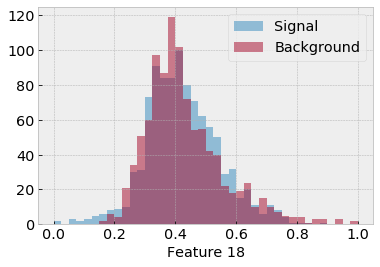

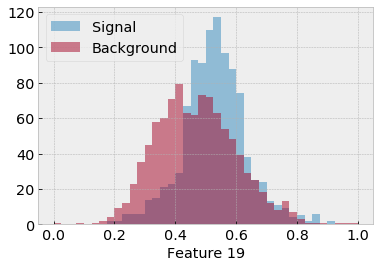

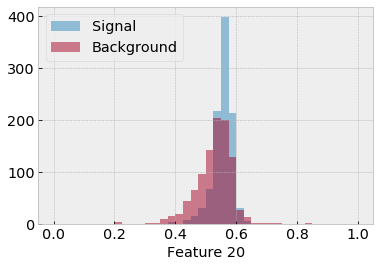

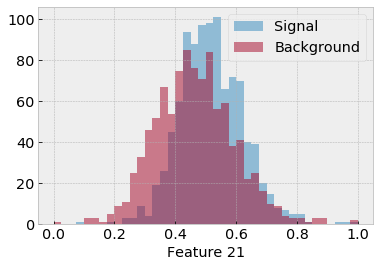

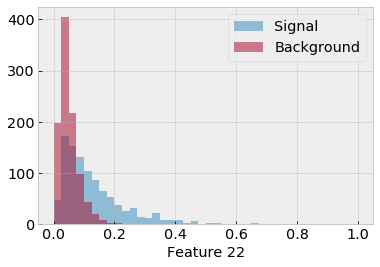

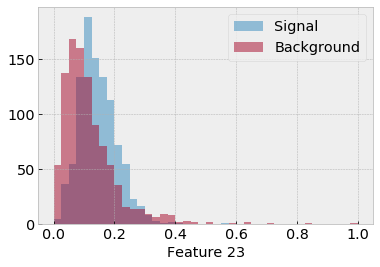

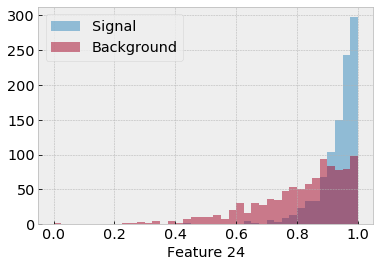

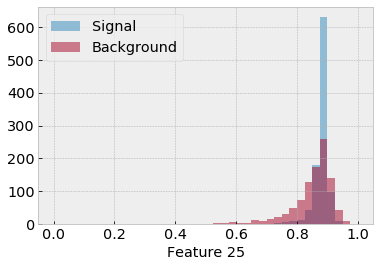

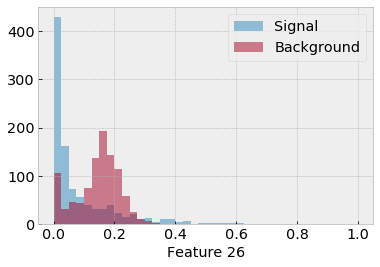

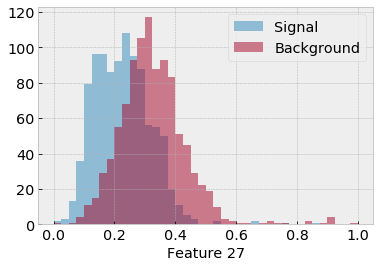

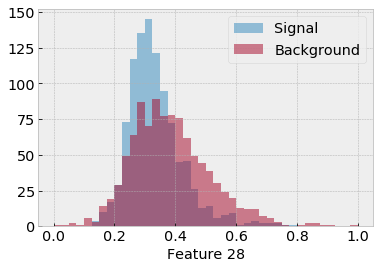

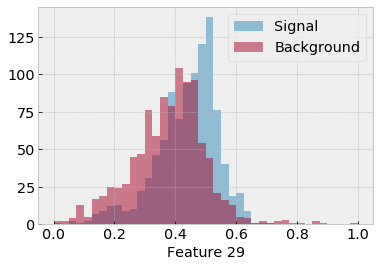

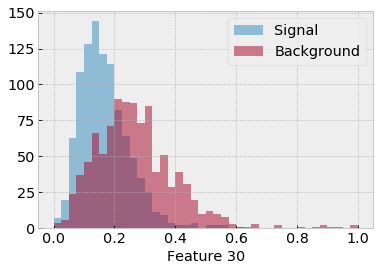

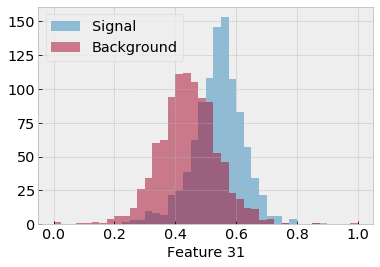

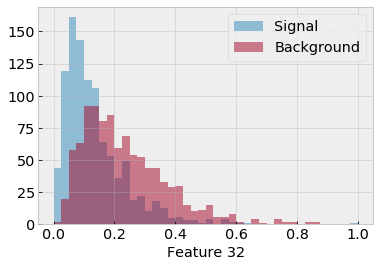

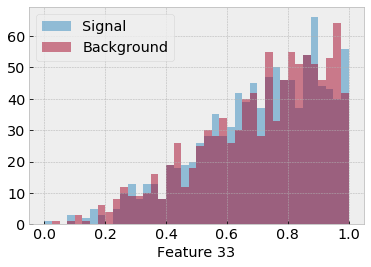

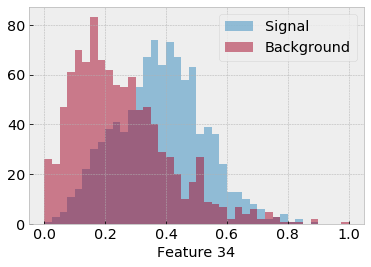

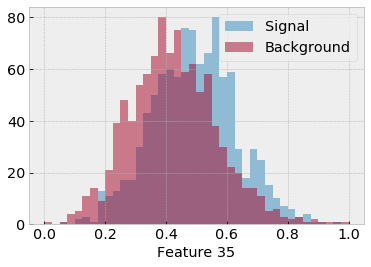

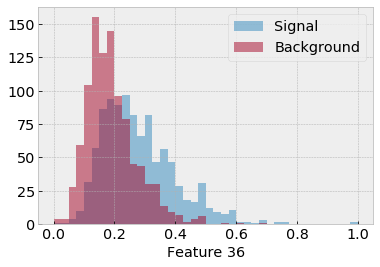

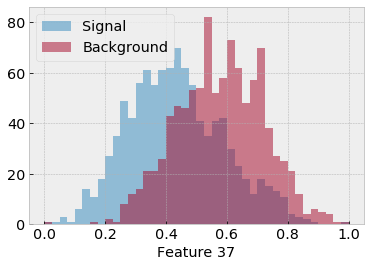

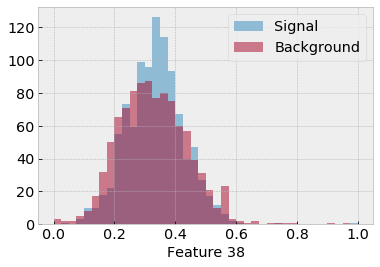

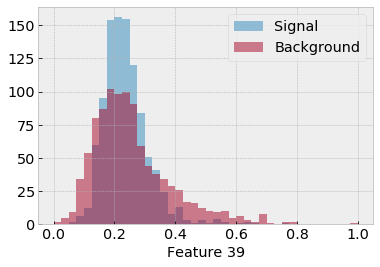

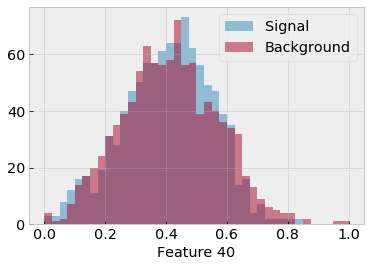

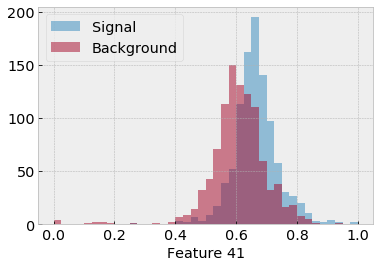

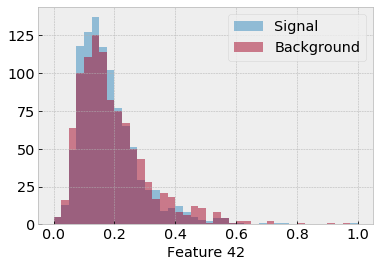

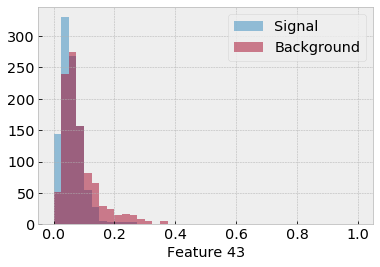

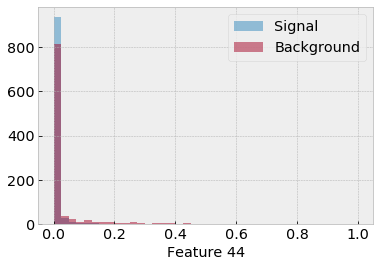

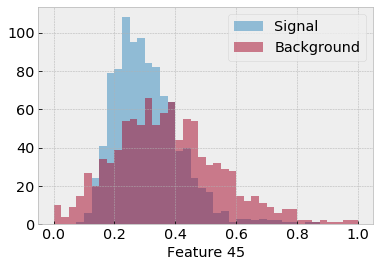

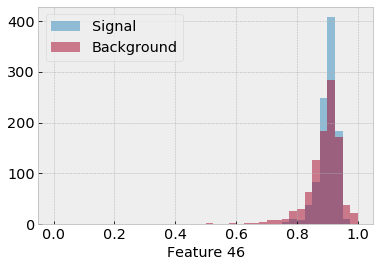

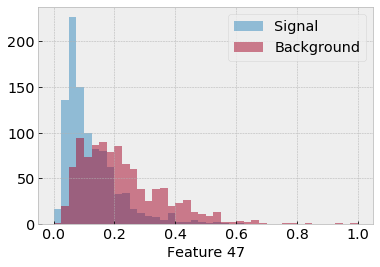

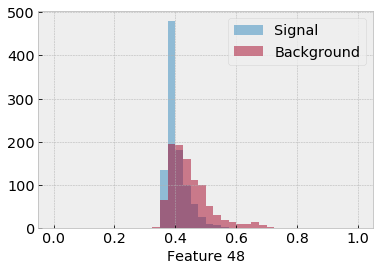

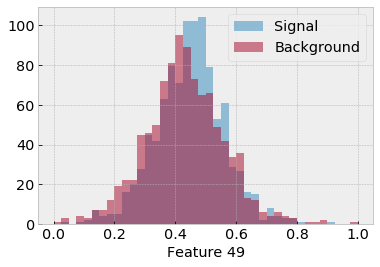

In [18]:
#Do some plotting
for col in range(50):
    plt.figure()
    #Extract signal and background for this column from pandas dataframe
    sig=mball[mball.sigback==0][col]
    back=mball[mball.sigback==1][col]
    #Get binning by merging the datasets, plotting, and returning the binning (index 1)
    bins=np.histogram(np.hstack((sig,back)), bins=40)[1]
    plt.hist(sig, label='Signal', alpha=0.5, bins=bins)
    plt.hist(back, label='Background', alpha=0.5, bins=bins)
    plt.xlabel('Feature %d'%col)
    plt.legend()
    plt.show()

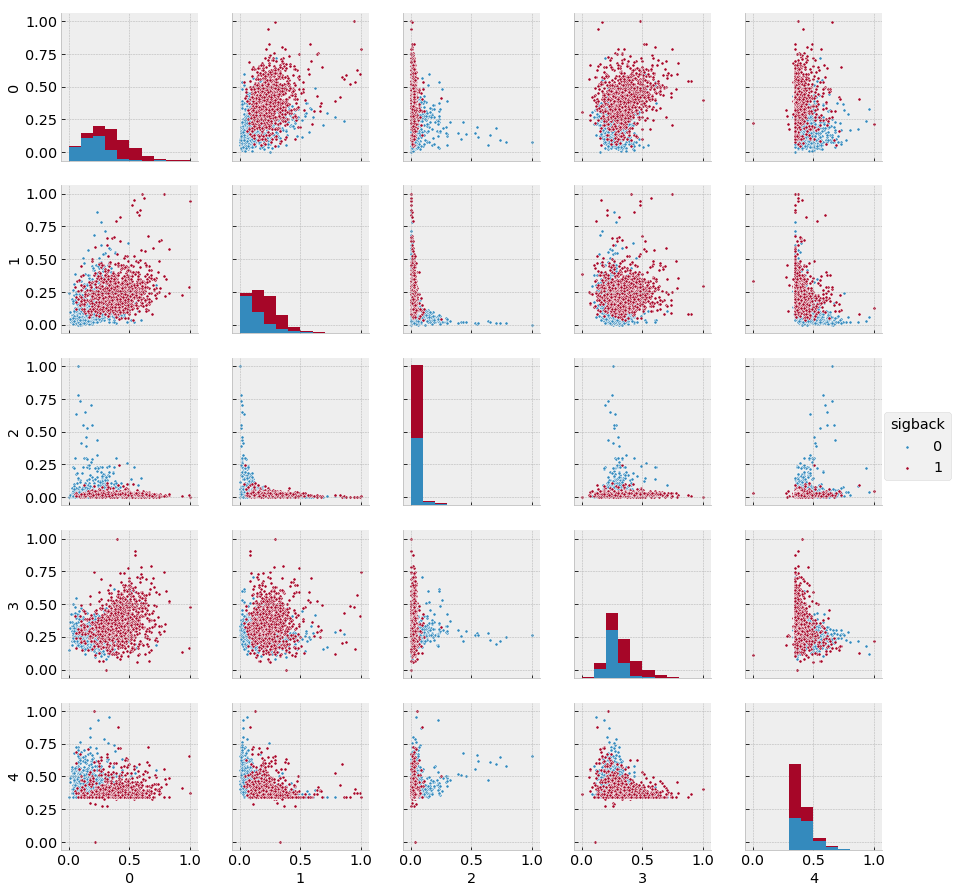

In [19]:
#Plot pairwise 2d correlation plots for the first 5 features
#Note: this uses the seaborn library
sns.pairplot(mball, hue="sigback", vars=[0,1,2,3,4], size=2.5, plot_kws=dict(s=10))